In [1]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df_population = pd.read_csv("Population_growth.csv")

In [3]:
df_population = df_population.loc[4:]

In [4]:
df_population.rename(columns={'Data Source':'Country Name',
                        'Unnamed: 4':'1960',
                        'Unnamed: 5':'1961',
                        'Unnamed: 6':'1962',
                        'Unnamed: 7':'1963',
                        'Unnamed: 8':'1964',
                        'Unnamed: 9':'1965',
                        'Unnamed: 10':'1966',
                        'Unnamed: 11':'1967',
                        'Unnamed: 12':'1968',
                        'Unnamed: 13':'1969',
                        'Unnamed: 14':'1970',
                        'Unnamed: 15':'1971',
                        'Unnamed: 16':'1972',
                        'Unnamed: 17':'1973',
                        'Unnamed: 18':'1974',
                        'Unnamed: 19':'1975',
                        'Unnamed: 20':'1976',
                        'Unnamed: 21':'1977',
                        'Unnamed: 22':'1978',
                        'Unnamed: 23':'1979',
                        'Unnamed: 24':'1980',
                        'Unnamed: 25':'1981',
                        'Unnamed: 26':'1982',
                        'Unnamed: 27':'1983',
                        'Unnamed: 28':'1984',
                        'Unnamed: 29':'1985',
                        'Unnamed: 30':'1986',
                        'Unnamed: 31':'1987',
                        'Unnamed: 32':'1988',
                        'Unnamed: 33':'1989',
                        'Unnamed: 34':'1990',
                        'Unnamed: 35':'1991',
                        'Unnamed: 36':'1992',
                        'Unnamed: 37':'1993',
                        'Unnamed: 38':'1994',
                        'Unnamed: 39':'1995',
                        'Unnamed: 40':'1996',
                        'Unnamed: 41':'1997',
                        'Unnamed: 42':'1998',
                        'Unnamed: 43':'1999',
                        'Unnamed: 44':'2000',
                        'Unnamed: 45':'2001',
                        'Unnamed: 46':'2002',
                        'Unnamed: 47':'2003',
                        'Unnamed: 48':'2004',
                        'Unnamed: 49':'2005',
                        'Unnamed: 50':'2006',
                        'Unnamed: 51':'2007',
                        'Unnamed: 52':'2008',
                        'Unnamed: 53':'2009',
                        'Unnamed: 54':'2010',
                        'Unnamed: 55':'2011',
                        'Unnamed: 56':'2012',
                        'Unnamed: 57':'2013',
                        'Unnamed: 58':'2014',
                        'Unnamed: 59':'2015',
                        'Unnamed: 60':'2016',
                        'Unnamed: 61':'2017',
                        'Unnamed: 62':'2018'},
                 inplace=True)

In [5]:
df_population = df_population.set_index('Country Name')

In [6]:
df_population.to_excel("population_growth_new.xlsx")

In [7]:
z = list(df_population.loc['India'][3:])

In [8]:
z = pd.DataFrame(z, columns = ['pop_value'])

In [9]:
z['year'] = range(1960,2019)

In [10]:
z1 = z.set_index('year')

In [11]:
len(z1)

59

In [12]:
from sklearn import metrics

X = z1.values
X = [int(x) for x in X]
train = X[:50]
test = X[50:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("R^2:", metrics.r2_score(test, predictions))

C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


predicted=1233936398.639623, expected=1234281170.000000
predicted=1250302665.809736, expected=1250288729.000000
predicted=1265959462.128018, expected=1265782790.000000
predicted=1281285336.630040, expected=1280846129.000000
predicted=1296075564.858153, expected=1295604184.000000
predicted=1310782370.309153, expected=1310152403.000000
predicted=1325153375.394264, expected=1324509589.000000
predicted=1339472562.486620, expected=1338658835.000000
predicted=1353427794.852668, expected=1352617328.000000
R^2: 0.9997936840017788


C:\Users\pooji\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


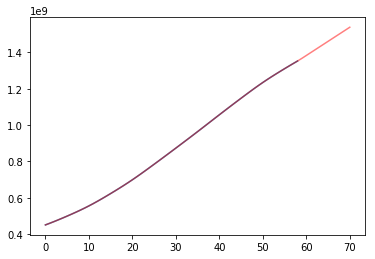

In [13]:
X = z1.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(60,72):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = int(output[0])
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [14]:
pop_pred = pd.DataFrame(predictions, columns = ['pop_pred'])

In [15]:
len(pop_pred)

71

In [16]:
pop_pred['Year'] = list(range(1960,2031))

In [17]:
pop_pred.to_excel("population_growth_forecast_1960-2030_India.xlsx")